## Importing Datasets

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [295]:
customer_acq = pd.read_csv('/Users/abc/Downloads/Analytix Lab AI Course Files/Assignments/Assignment 4 Case Study 2 - Credit Card Case Study/Customer Acqusition.csv')
repay = pd.read_csv('/Users/abc/Downloads/Analytix Lab AI Course Files/Assignments/Assignment 4 Case Study 2 - Credit Card Case Study/Repayment.csv', parse_dates=[2])
spend = pd.read_csv('/Users/abc/Downloads/Analytix Lab AI Course Files/Assignments/Assignment 4 Case Study 2 - Credit Card Case Study/spend.csv', parse_dates=[2])

## Q1(a)  In case age is less than 18, replace it with mean of age values

In [296]:
customer_acq.loc[customer_acq.Age <18, 'Age'] = customer_acq.Age.mean()
customer_acq.Age.min()

19.0

## Q1(b) In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

In [297]:
cust_spend = pd.merge(spend, customer_acq, left_on='Customer', right_on = 'Customer', how='left')
cust_spend

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,2004-01-03,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,2004-01-25,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [298]:
cust_spend.Amount = np.where(cust_spend.Amount> cust_spend.Limit, cust_spend.Limit/2, cust_spend.Amount)
print('The Spend amount is replaced by 50% of Limit, if Spend Amount is more than Limit')
cust_spend

The Spend amount is replaced by 50% of Limit, if Spend Amount is more than Limit


,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,2004-01-03,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,2004-01-25,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497,A68,2006-03-25,BUS TICKET,50000.00,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,2006-03-31,BUS TICKET,5000.00,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,2006-03-23,BUS TICKET,5000.50,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


## Q1(c) Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [299]:
cust_repay = pd.merge(customer_acq, repay, on='Customer', how='right')
cust_repay.dropna(how='all', inplace=True)
cust_repay.dropna(how='all', axis=1, inplace=True)
cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1.0,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75
1,1.0,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02
2,1.0,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06
3,1.0,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,2004-01-25,437555.12
4,1.0,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...,...
1495,67.0,A67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary,1496.0,2005-05-09,55638.77
1496,68.0,A68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed,1497.0,2006-05-10,319836.49
1497,69.0,A69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed,1498.0,2006-07-11,247628.45
1498,70.0,A70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed,1499.0,2005-08-12,454016.51


In [300]:
cust_repay.Amount = np.where(cust_repay.Amount> cust_repay.Limit, cust_repay.Limit, cust_spend.Amount)
print('The Repayment amount is replaced by Limit if Repay Amount is more than Limit')
cust_repay

The Repayment amount is replaced by Limit if Repay Amount is more than Limit


,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1.0,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,485470.80
1,1.0,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,410556.13
2,1.0,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,23740.46
3,1.0,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,2004-01-25,484342.47
4,1.0,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,2005-01-17,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1495,67.0,A67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary,1496.0,2005-05-09,356872.73
1496,68.0,A68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed,1497.0,2006-05-10,100000.00
1497,69.0,A69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed,1498.0,2006-07-11,10000.00
1498,70.0,A70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed,1499.0,2005-08-12,10001.00


## Q2(a) How many distinct customers exist?

In [301]:
unique_cust = customer_acq.Customer.nunique()
print(f'The total number of unique customers is {unique_cust}')

The total number of unique customers is 100


## Q2(b) How many distinct categories exist?

In [302]:
unique_cat = customer_acq.Segment.nunique()
print(f'The total number of unique Categories is {unique_cat}')

The total number of unique Categories is 5


## Q2(c) What is the average monthly spend by customers?

In [303]:
cust_spend['Yearly'] = cust_spend.Month.apply(lambda x: pd.Timestamp.strftime(x, format='%Y'))
cust_spend['Monthly'] = cust_spend.Month.apply(lambda x: pd.Timestamp.strftime(x, format='%B'))

spend_group = cust_spend.groupby(['Monthly','Yearly'])['Amount'].mean()
print(f'The average monthly spend by customers is \n{spend_group}')

The average monthly spend by customers is 
Monthly    Yearly
April      2004      124621.976429
           2005      146430.918929
           2006      134743.702447
August     2005      141707.435357
           2006      213863.917857
December   2005       84416.000000
           2006      150129.360714
February   2004      136998.280000
           2005      154334.423869
           2006      148478.986905
January    2004      144233.915179
           2005      192271.670714
           2006      136312.515714
July       2005      120803.091429
           2006      189088.681071
June       2005      190726.475714
           2006      155971.498571
March      2004      133708.090714
           2006      131720.289032
May        2004      153326.954286
           2005      154625.803000
           2006      143693.687143
November   2004       79642.078571
           2005      178120.211667
           2006      144283.947143
October    2005       89879.421429
           2006      172156.2

## Q2(d) What is the average monthly repayment by customers?

In [304]:
cust_repay['Yearly'] = cust_repay.Month.apply(lambda x: pd.Timestamp.strftime(x, format='%Y'))
cust_repay['Monthly'] = cust_repay.Month.apply(lambda x: pd.Timestamp.strftime(x, format='%B'))
cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Yearly,Monthly
0,1.0,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,485470.80,2004,January
1,1.0,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,410556.13,2004,January
2,1.0,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,23740.46,2004,January
3,1.0,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,2004-01-25,484342.47,2004,January
4,1.0,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,2005-01-17,369694.07,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,67.0,A67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary,1496.0,2005-05-09,356872.73,2005,May
1496,68.0,A68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed,1497.0,2006-05-10,100000.00,2006,May
1497,69.0,A69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed,1498.0,2006-07-11,10000.00,2006,July
1498,70.0,A70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed,1499.0,2005-08-12,10001.00,2005,August


In [294]:
repay_group = cust_repay.groupby(['Monthly','Yearly'])['Amount'].mean()
print(f'The average monthly spend by customers is \n{repay_group}')

The average monthly spend by customers is 
Monthly    Yearly
April      2004      137302.228667
           2005      121318.842000
           2006      163931.099000
August     2005      157912.092162
           2006      134454.523333
December   2005      154379.595833
           2006      176194.407500
February   2004      105850.321111
           2005      150877.205370
           2006      145966.536410
January    2004      171771.038679
           2005      135378.157778
           2006      140422.645000
July       2005      112408.691667
           2006      147035.484865
June       2005      127745.946111
           2006      104062.385000
March      2004      194334.520000
           2006      159746.017941
May        2004      167312.128000
           2005      187886.461623
           2006      175419.690805
November   2004      143769.958667
           2005      163148.265238
           2006      153901.789630
October    2005       81384.145000
           2006      248316.9

## Q2(e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [305]:
cust_spend_monthly = cust_spend.groupby(['Yearly','Monthly'], as_index=False)['Amount'].sum()
cust_repay_monthly = cust_repay.groupby(['Yearly','Monthly'], as_index=False)['Amount'].sum()

cust_monthly = pd.merge(cust_spend_monthly, cust_repay_monthly, on=['Yearly','Monthly'], suffixes=("_Spent","_Repaid"))
cust_monthly['Monthly_Profit'] = cust_monthly['Amount_Repaid'] - cust_monthly['Amount_Spent']
cust_monthly['Interest Earned'] = np.where(cust_monthly.Monthly_Profit > 0, round(2.9*cust_monthly.Monthly_Profit/100,2), 0)
print('The Monthly Profit Earned by Bank is \n')
cust_monthly

The Monthly Profit Earned by Bank is 



,Yearly,Monthly,Amount_Spent,Amount_Repaid,Monthly_Profit,Interest Earned
0,2004,April,3489415.34,4119066.86,629651.52,18259.89
1,2004,February,3835951.84,2857958.67,-977993.17,0.00
2,2004,January,44279811.96,48095890.83,3816078.87,110666.29
3,2004,March,1871913.27,2915017.80,1043104.53,30250.03
4,2004,May,2146577.36,4182803.20,2036225.84,59050.55
5,2004,November,1114989.10,2156549.38,1041560.28,30205.25
6,2004,September,2402109.69,2190405.65,-211704.04,0.00
7,2005,April,4100065.73,3639565.26,-460500.47,0.00
8,2005,August,3967808.19,5842747.41,1874939.22,54373.24
9,2005,December,1181824.00,1852555.15,670731.15,19451.20


## Q2(f) What are the top 5 product types?

In [307]:
top_product_types = cust_spend.groupby('Type')['Amount'].sum().sort_values(ascending=False).head(5)
print(f'Top 5 product types are {list(top_product_types.index)}')

Top 5 product types are ['PETRO', 'CAMERA', 'FOOD', 'AIR TICKET', 'TRAIN TICKET']


## Q2(g) Which city is having maximum spend?

In [308]:
max_spend_city = cust_spend.groupby('City')['Amount'].sum().sort_values(ascending=False)
print(f'Maximum Spending City is {max_spend_city.index[0]}')

Maximum Spending City is COCHIN


## Q2(h) Which age group is spending more money?

The Age Group 42-50 has the maximum spend


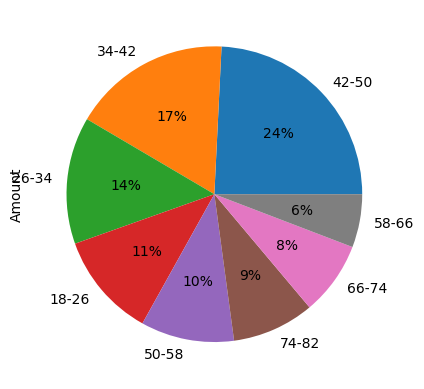

In [309]:
cust_spend['Age_Group'] = pd.cut(cust_spend.Age, bins=[18,26,34,42,50,58,66,74,82], labels=['18-26','26-34','34-42','42-50','50-58','58-66','66-74','74-82'])
age_spend = cust_spend.groupby("Age_Group")['Amount'].sum().sort_values(ascending=False)
age_spend.plot(kind='pie', autopct="%1.0f%%")
print('The Age Group 42-50 has the maximum spend')

## Q2(i) Who are the top 10 customers in terms of repayment?

In [310]:
top_ten_repay = cust_repay.groupby('Customer')['Amount'].sum().sort_values(ascending=False).head(10)
print(f'The top 10 customers in terms of repayment are {list(top_ten_repay.index)}')
top_ten_repay

The top 10 customers in terms of repayment are ['A60', 'A38', 'A40', 'A61', 'A13', 'A12', 'A39', 'A14', 'A42', 'A41']


Customer
A60    11020930.98
A38     9102803.62
A40     9061868.60
A61     9002326.39
A13     8231607.26
A12     8183050.64
A39     7750508.22
A14     7661086.20
A42     7116225.74
A41     7074413.17
Name: Amount, dtype: float64

## Q3 Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.


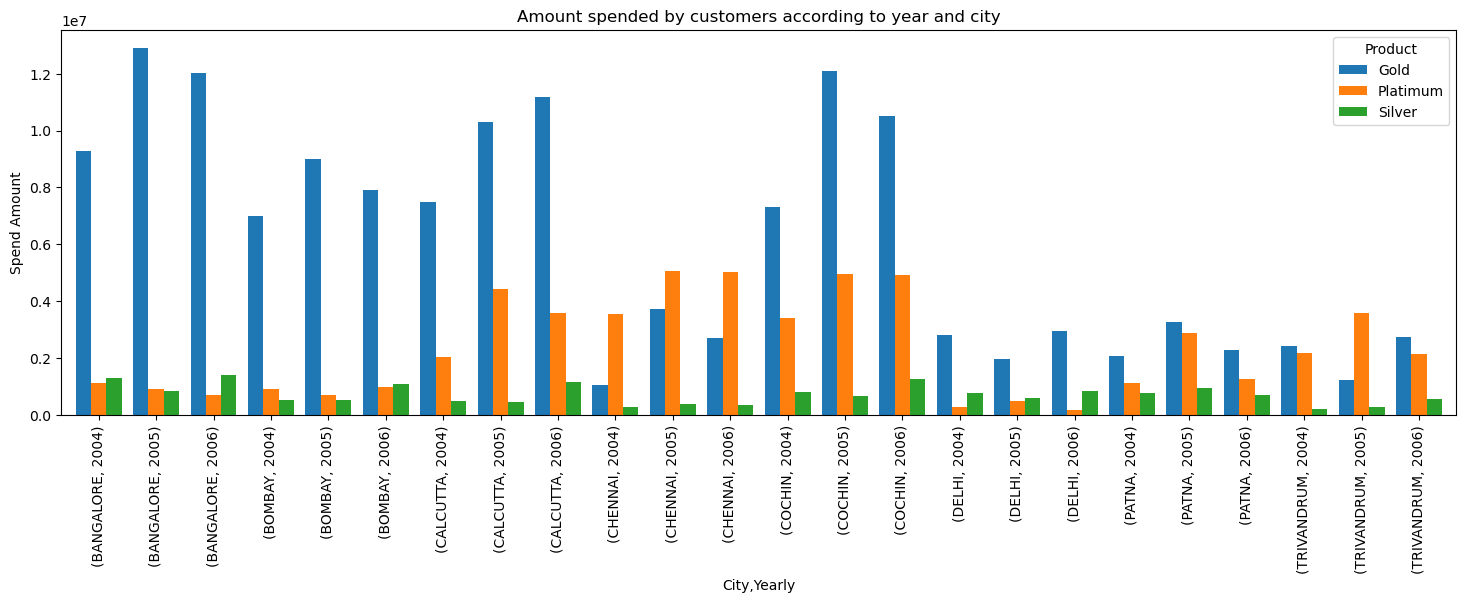

In [312]:
cust_spend['Yearly'] = cust_spend.Month.apply(lambda x: pd.Timestamp.strftime(x, format='%Y'))
customer_spend_pivot = pd.pivot_table(data = cust_spend,index=["City","Yearly"],columns='Product',aggfunc="sum",values="Amount")
customer_spend_pivot
customer_spend_pivot.plot(kind="bar",figsize=(18,5),width=0.8, ylabel='Spend Amount', title='Amount spended by customers according to year and city')
plt.show()

## Q4(a) Create graphs for Monthly comparison of total spends, city wise

In [313]:
cust_spend['Monthly'] = cust_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
cust_spend

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Yearly,Monthly,Age_Group
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January,74-82
1,2,A1,2004-01-03,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January,74-82
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January,74-82
3,4,A1,2004-01-25,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January,74-82
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2005,January,74-82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary,2006,February,50-58
1496,1497,A68,2006-03-25,BUS TICKET,50000.00,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed,2006,March,42-50
1497,1498,A69,2006-03-31,BUS TICKET,5000.00,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed,2006,March,26-34
1498,1499,A70,2006-03-23,BUS TICKET,5000.50,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed,2006,March,42-50


<Figure size 640x480 with 0 Axes>

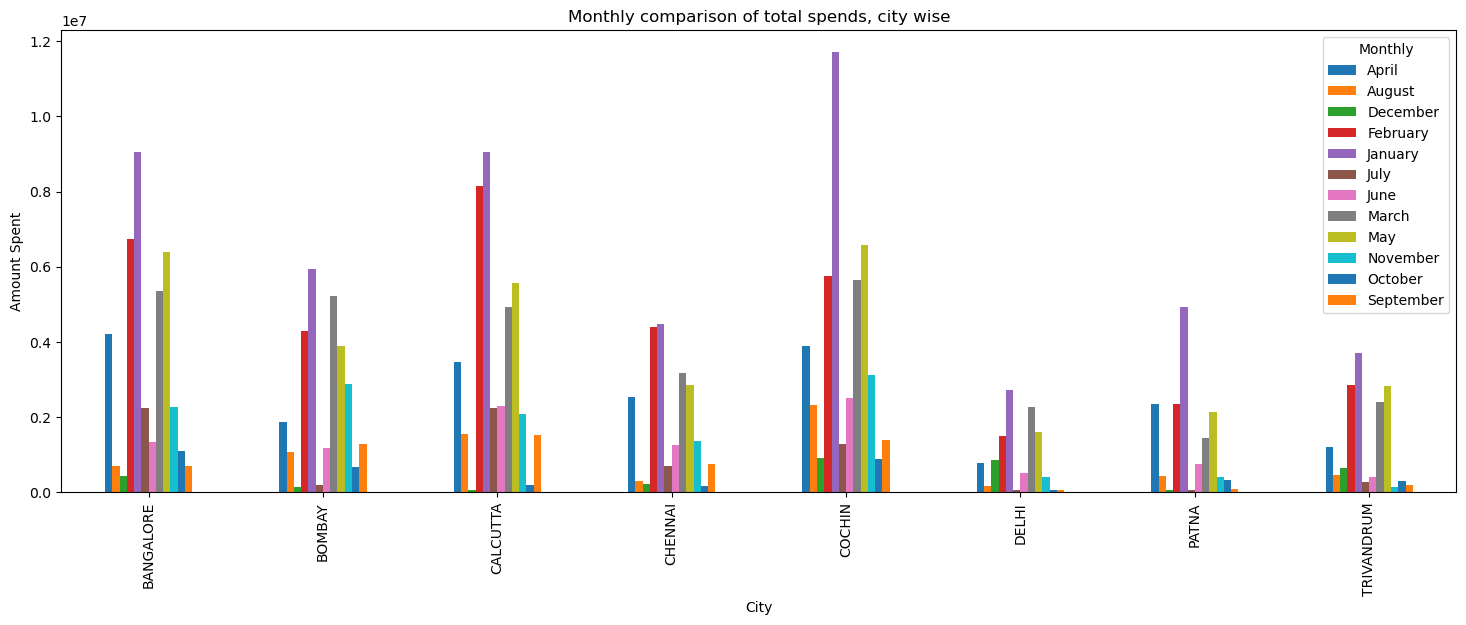

In [314]:
spend_city_month = pd.pivot_table(data=cust_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')
plt.figure()
spend_city_month.plot(kind="bar", ylabel='Amount Spent',figsize=(18,6), title='Monthly comparison of total spends, city wise')
plt.show()

## Q4(b) Comparison of yearly spend on air tickets

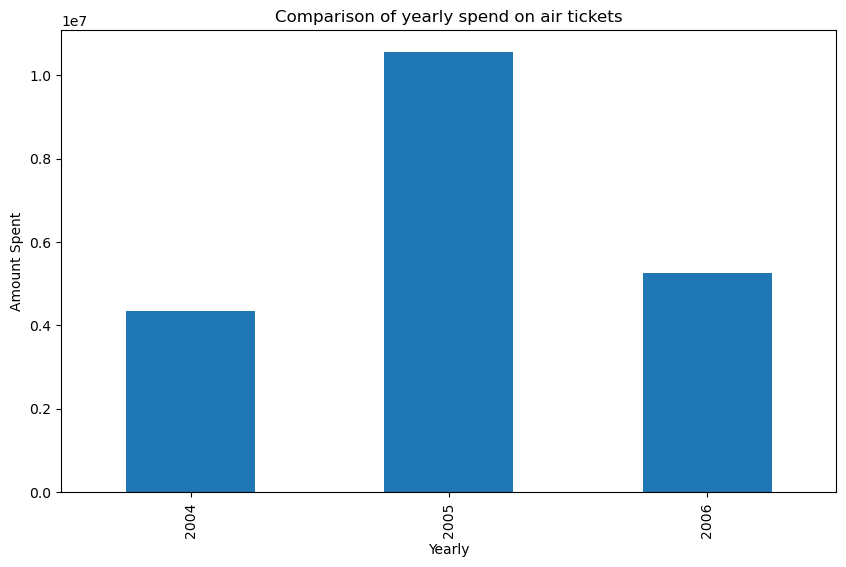

In [315]:
spend_city_year_air = pd.pivot_table(data=cust_spend,values='Amount',index=['Yearly'],columns=['Type'],aggfunc='sum')['AIR TICKET']
plt.figure()
spend_city_year_air.plot(kind="bar", ylabel='Amount Spent',figsize=(10,6), title='Comparison of yearly spend on air tickets')
plt.show()

## Q4(c) Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

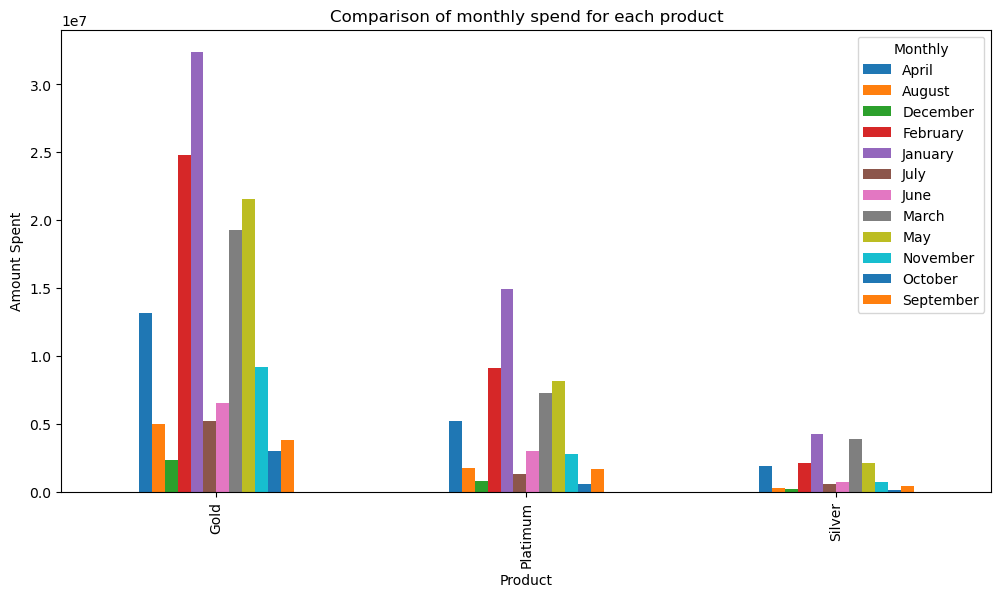

Months of April, February, January, March and May saw maximum spendings which is end of winter and start of summer 


In [316]:
spend_product_month = pd.pivot_table(data=cust_spend,values='Amount',index='Product',columns='Monthly',aggfunc='sum')
spend_product_month.plot(kind="bar", ylabel='Amount Spent',figsize=(12,6), title='Comparison of monthly spend for each product')
plt.show()
print('Months of April, February, January, March and May saw maximum spendings which is end of winter and start of summer ')

## Q5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [317]:
def top_ten_cust(product,time_period):
    if product.lower()=='gold' and time_period.lower()=='monthly':
        cust_table = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = cust_table.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and time_period.lower()=='yearly':
        cust_table = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = cust_table.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and time_period.lower()=='monthly':
        cust_table = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = cust_table.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and time_period.lower()=='yearly':
        cust_table = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = cust_table.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platimum' and time_period.lower()=='monthly':
        cust_table = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = cust_table.loc[('Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platimum' and time_period.lower()=='yearly':
        cust_table = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = cust_table.loc[('Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

top_ten_cust('silver','monthly')

Monthly                          April    August  December   February  \
Product City       Customer                                             
Silver  BANGALORE  A18       100000.00  100000.0       NaN   50000.00   
                   A23       385302.46  100001.0       NaN  452469.01   
                   A59        50001.50       NaN       NaN  200006.00   
                   A72             NaN       NaN       NaN  100000.00   
                   A76             NaN       NaN       NaN   30066.44   
                   A77             NaN       NaN       NaN   31048.93   
        COCHIN     A100            NaN       NaN       NaN        NaN   
                   A25       300009.00   50001.5       NaN  250007.50   
                   A7              NaN       NaN  100001.0  100001.00   
                   A74             NaN       NaN       NaN  100002.00   
                   A79             NaN       NaN       NaN        NaN   
        CALCUTTA   A2        200000.00  100000.0       NaN  300000.00   
                   A58       200004.00       NaN       NaN  150003.00   
                   A73             NaN       NaN       NaN  100001.00   
                   A78             NaN       NaN       NaN        NaN   
                   A87             NaN       NaN       NaN        NaN   
        BOMBAY     A22       350000.00  100000.0       NaN  350000.00   
                   A75             NaN       NaN       NaN  100003.00   
                   A80             NaN       NaN       NaN        NaN   
        CHENNAI    A85             NaN       NaN       NaN        NaN   
                   A9         83927.36       NaN       NaN  250007.50   
                   A96             NaN       NaN       NaN        NaN   
        TRIVANDRUM A57       150001.50       NaN  100001.0  200002.00   
                   A68             NaN       NaN       NaN        NaN   
                   A86             NaN       NaN       NaN        NaN   
        PATNA      A46       350000.00       NaN       NaN  550000.00   
                   A8        100002.00       NaN       NaN  300006.00   
                   A84             NaN       NaN       NaN        NaN   
        DELHI      A24       300006.00  100002.0  100002.0  250005.00   
                   A6              NaN       NaN   50000.0  100000.00   

Monthly                        January      July      June      March  \
Product City       Customer                                             
Silver  BANGALORE  A18       424647.08       NaN  200000.0  600000.00   
                   A23       480150.72  100001.0       NaN  100001.00   
                   A59       450013.50  100003.0  150004.5  400012.00   
                   A72             NaN       NaN       NaN        NaN   
                   A76             NaN       NaN       NaN        NaN   
                   A77             NaN       NaN       NaN        NaN   
        COCHIN     A100       50000.00       NaN       NaN        NaN   
                   A25       550016.50  100003.0       NaN  300009.00   
                   A7        550005.50       NaN       NaN  250002.50   
                   A74             NaN       NaN       NaN        NaN   
                   A79             NaN       NaN       NaN  405913.14   
        CALCUTTA   A2        200000.00       NaN       NaN        NaN   
                   A58       350007.00       NaN  100002.0  450009.00   
                   A73             NaN       NaN       NaN        NaN   
                   A78             NaN       NaN       NaN  432217.57   
                   A87             NaN       NaN       NaN  100003.00   
        BOMBAY     A22       900000.00  100000.0  100000.0  250000.00   
                   A75             NaN       NaN       NaN        NaN   
                   A80             NaN       NaN       NaN  474797.30   
        CHENNAI    A85             NaN       NaN       NaN  100001.00   
                   A9        364510.88       NaN       Na